In [74]:
import blimpy
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib.colors
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
%matplotlib inline

In [75]:
"""Loading files into Waterfall and naming to respective observation number"""
filepath1 = '../HIP66704/spliced_blc0001020304050607_guppi_57650_54573_Hip66704_0003.gpuspec.0000.h5'
filepath2 = '../HIP66704/spliced_blc0001020304050607_guppi_57650_54910_Hip65678_0004.gpuspec.0000.h5'
filepath3 = '../HIP66704/spliced_blc0001020304050607_guppi_57650_55247_Hip66704_0005.gpuspec.0000.h5'
filepath4 = '../HIP66704/spliced_blc0001020304050607_guppi_57650_55588_Hip65946_0006.gpuspec.0000.h5'
filepath5 = '../HIP66704/spliced_blc0001020304050607_guppi_57650_55929_Hip66704_0007.gpuspec.0000.h5'
filepath6 = '../HIP66704/spliced_blc0001020304050607_guppi_57650_56272_Hip66192_0008.gpuspec.0000.h5'
waterfall1 = blimpy.Waterfall(filepath1)
waterfall2 = blimpy.Waterfall(filepath2)
waterfall3 = blimpy.Waterfall(filepath3)
waterfall4 = blimpy.Waterfall(filepath4)
waterfall5 = blimpy.Waterfall(filepath5)
waterfall6 = blimpy.Waterfall(filepath6)

In [76]:
"""Logging times and freqs of each observation into respective variable names, times# and freqs#."""
times1 = waterfall1.populate_timestamps()
times2 = waterfall2.populate_timestamps()
times3 = waterfall3.populate_timestamps()
times4 = waterfall4.populate_timestamps()
times5 = waterfall5.populate_timestamps()
times6 = waterfall6.populate_timestamps()
freqs1 = waterfall1.populate_freqs()
freqs2 = waterfall2.populate_freqs()
freqs3 = waterfall3.populate_freqs()
freqs4 = waterfall4.populate_freqs()
freqs5 = waterfall5.populate_freqs()
freqs6 = waterfall6.populate_freqs()
"""Logging the power data of each file into its corresponding variable name"""
data1comp = waterfall1.data[:, 0, :]
data2comp = waterfall2.data[:, 0, :]
data3comp = waterfall3.data[:, 0, :]
data4comp = waterfall4.data[:, 0, :]
data5comp = waterfall5.data[:, 0, :]
data6comp = waterfall6.data[:, 0, :]

In [77]:
"""Converting timestamps into seconds elapsed since first observation"""
def elapsedTime(times):
    timesElapsedDays = times - times[0]
    timesElapsedSeconds = timesElapsedDays * 86400
    return(timesElapsedSeconds)

telapsed1 = elapsedTime(times1)
telapsed2 = elapsedTime(times2)
telapsed3 = elapsedTime(times3)
telapsed4 = elapsedTime(times4)
telapsed5 = elapsedTime(times5)
telapsed6 = elapsedTime(times6)

In [78]:
"""extracting the time and frequency of each power datapoint. obsNumber corresponds to filepath number (1-6).
Indexing in python starts from 0!!!!!"""
def locateTime(obsNumber, vertIndex):
    if obsNumber == 1:
        time = telapsed1[vertIndex]
    elif obsNumber == 2:
        time = telapsed2[vertIndex]
    elif obsNumber == 3:
        time = telapsed3[vertIndex]
    elif obsNumber == 4:
        time = telapsed4[vertIndex]
    elif obsNumber == 5:
        time = telapsed5[vertIndex]
    elif obsNumber == 6:
        time = telapsed6[vertIndex]
    return(time)

def locateFreq(obsNumber, horizIndex):
    if obsNumber == 1:
        freq = freqs1[horizIndex]
    elif obsNumber == 2:
        freq = freqs2[horizIndex]
    elif obsNumber == 3:
        freq = freqs3[horizIndex]
    elif obsNumber == 4:
        freq = freqs4[horizIndex]
    elif obsNumber == 5:
        freq = freqs5[horizIndex]
    elif obsNumber == 6:
        freq = freqs6[horizIndex]
    return(freq)

"""Finding the time and freq for every data entry and putting them into a separate list. Input for function should
be data#comp. Remember horizDim corresponds to freq. vertDim corresponds to time."""
def reorganizingAll(data, obsNumber):
    plotTime = []
    plotFreqs = []
    dataAsList = []
    horizDim = data.shape[1]
    vertDim = data.shape[0]
    for i in range(vertDim):
        for j in range(horizDim):
            plotTime.append(locateTime(obsNumber, i))
            plotFreqs.append(locateFreq(obsNumber, j))
            dataAsList.append(data[i, j])
    dataAsArray = np.array(dataAsList).reshape(16, 71583)
    plotFreqsArray = np.array(plotFreqs).reshape(16, 71583)
    plotTimeArray = np.array(plotTime).reshape(16, 71583)
    return(plotFreqsArray, plotTimeArray, dataAsArray)

In [118]:
"""Replotting the data with a standardized. onObsNumber are 1, 3, or 5. Freqstart, freqend, tstart, tend decide
which section of the graph will be zoomed in on."""
def rePlotWithOffObs(onData, offData, onObsNumber, freqstart, freqend, tstart, tend):
    
    fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 11))
    """onObservation plot"""
    freq1Array, time1Array, onDataArray = reorganizingAll(onData, onObsNumber)
    onO = plt.subplot(2, 2, 1)
    onO.set_xticks([2251.30, 2251.35, 2251.40, 2251.45])
    onO.set_xlim([np.amin(freq1Array), np.amax(freq1Array)])
    onO.set_ylim([np.amin(time1Array), np.amax(time1Array)])
    onO.set_xlabel('Frequency [MHz]')
    onO.set_ylabel('Time [s]')
    onO.set_title("HIP66704 On Observation " + str(onObsNumber))
    onO_contour = plt.contourf(freq1Array, time1Array, onDataArray, cmap = 'viridis')
    
    """Setting the colorbar for the on graph"""
    norm = matplotlib.colors.Normalize(vmin=onO_contour.cvalues.min(), vmax=onO_contour.cvalues.max())
    sm = plt.cm.ScalarMappable(norm=norm, cmap = onO_contour.cmap)
    sm.set_array([])
    plt.colorbar(sm, ticks = onO_contour.levels)
    
    """Zooming in on the chosen section of the onObservation"""
    axesOnObs = zoomed_inset_axes(onO, 3, loc=9) # zoom-factor: 2.5, location: upper-left
    axesOnObs.contourf(freq1Array, time1Array, onDataArray)
    axesOnObs.set_xlim(freqstart, freqend) # apply the x-limits
    axesOnObs.set_ylim(tstart, tend) # apply the y-limits
    plt.yticks(visible=False)
    plt.xticks(visible=False)
    mark_inset(onO, axesOnObs, loc1=3, loc2=4, fc="none", ec="0.5")
    
    """Plotting the zoomed in section of onO on separate subplot with colorbar"""
    onO_zoom = plt.subplot(2, 2, 2)
    onO_zoom.set_xticks(np.linspace(freqstart, freqend, 5, endpoint = True))
    onO_zoom.set_xlim([freqstart, freqend])
    onO_zoom.set_ylim([tstart, tend])
    onO_zoom.set_xlabel('Frequency [MHz]')
    onO_zoom.set_ylabel('Time [s]')
    onO_zoom.set_title("On Observation Zoomed In")
    onO_zoom_contour = plt.contourf(freq1Array, time1Array, onDataArray, cmap = 'viridis')
    
    norm = matplotlib.colors.Normalize(vmin=onO_zoom_contour.cvalues.min(), vmax=onO_zoom_contour.cvalues.max())
    sm = plt.cm.ScalarMappable(norm=norm, cmap = onO_zoom_contour.cmap)
    sm.set_array([])
    plt.colorbar(sm, ticks = onO_zoom_contour.levels)
    
    """offObservation plot"""
    freq2Array, time2Array, offDataArray = reorganizingAll(offData, onObsNumber + 1)
    offO = plt.subplot(2, 2, 3)
    offO.set_xticks([2251.30, 2251.35, 2251.40, 2251.45])
    offO.set_xlim([np.amin(freq2Array), np.amax(freq2Array)])
    offO.set_ylim([np.amin(time2Array), np.amax(time2Array)])
    offO.set_xlabel('Frequency [MHz]') #setting the x axis of off graph
    offO.set_ylabel('Time [s]') #setting the y axis of off graph
    offO.set_title("HIP66704 Corresponding Off Observation")
    offO_contour = plt.contourf(freq2Array, time2Array, offDataArray)
    
    """Setting the colorbar for the off graph"""
    norm = matplotlib.colors.Normalize(vmin=offO_contour.cvalues.min(), vmax=offO_contour.cvalues.max())
    sm = plt.cm.ScalarMappable(norm=norm, cmap = offO_contour.cmap)
    sm.set_array([])
    plt.colorbar(sm, ticks = offO_contour.levels)
    
    """Zooming in on that same section of the off graph"""
    axesOffObs = zoomed_inset_axes(offO, 3, loc=9) # zoom-factor: 2.5, location: upper-left
    axesOffObs.contourf(freq2Array, time2Array, offDataArray)
    axesOffObs.set_xlim(freqstart, freqend) # apply the x-limits
    axesOffObs.set_ylim(tstart, tend) # apply the y-limits
    plt.yticks(visible=False)
    plt.xticks(visible=False)
    mark_inset(offO, axesOffObs, loc1=3, loc2=4, fc="none", ec="0.5")
    
    """Plotting the zoomed in area of the off area graph in a separate subplot"""
    offO_zoom = plt.subplot(2, 2, 4)
    offO_zoom.set_xticks(np.linspace(freqstart, freqend, 5, endpoint = True))
    offO_zoom.set_xlim([freqstart, freqend])
    offO_zoom.set_ylim([tstart, tend])
    offO_zoom.set_xlabel('Frequency [MHz]')
    offO_zoom.set_ylabel('Time [s]')
    offO_zoom.set_title("Off Observation Zoomed In")
    offO_zoom_contour = plt.contourf(freq2Array, time2Array, offDataArray, cmap = 'viridis')
    
    norm = matplotlib.colors.Normalize(vmin=offO_zoom_contour.cvalues.min(), vmax=offO_zoom_contour.cvalues.max())
    sm = plt.cm.ScalarMappable(norm=norm, cmap = offO_zoom_contour.cmap)
    sm.set_array([])
    plt.colorbar(sm, ticks = offO_zoom_contour.levels)
    
    plt.tight_layout

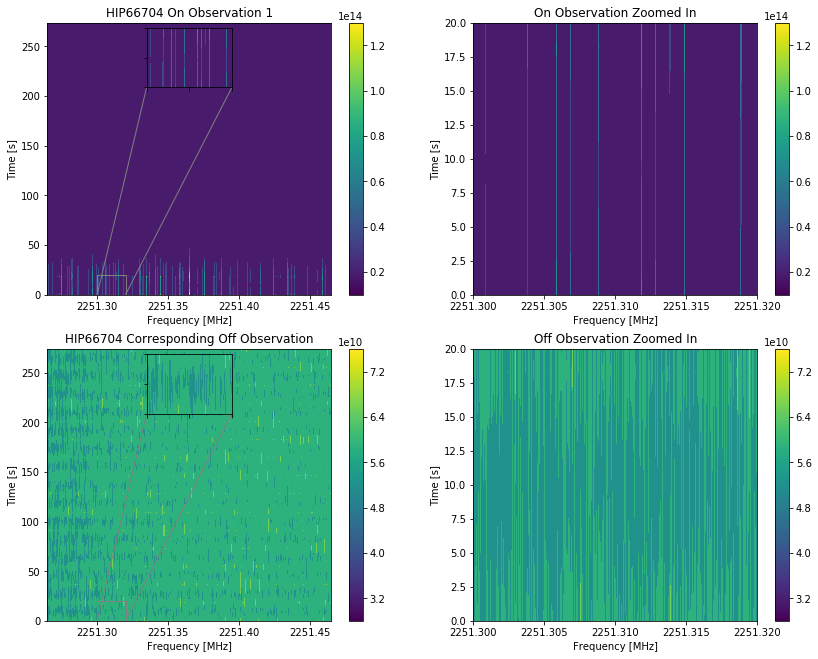

In [120]:
rePlotWithOffObs(data1comp, data2comp, 1, 2251.30, 2251.32, 0, 20)

In [73]:
np.max(np.divide(data1comp, 10**14))

1.35528221507584

In [53]:
data2new = np.divide(data2comp, 10**10)

In [56]:
np.min(data2new)

2.8174012416